# Análisis de Cota temporal de Insertion Sort

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de insertion sort. <br />Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [2]:
df = pd.read_csv("resultado_is.csv")
print(df)

    instancia     n        IS
0           1   100  0.004314
1           2   200  0.016560
2           3   300  0.034416
3           4   400  0.062492
4           5   500  0.096729
5           6   600  0.140329
6           7   700  0.204442
7           8   800  0.246265
8           9   900  0.323403
9          10  1000  0.386896
10         11  1100  0.470954
11         12  1200  0.561481
12         13  1300  0.663731
13         14  1400  0.777115
14         15  1500  0.886884
15         16  1600  1.012710
16         17  1700  1.138000
17         18  1800  1.272950
18         19  1900  1.408270
19         20  2000  1.548600
20         21  2100  1.741330
21         22  2200  1.923110
22         23  2300  2.076000
23         24  2400  2.260650
24         25  2500  2.481200
25         26  2600  2.654650
26         27  2700  3.046720
27         28  2800  3.113600
28         29  2900  3.329520
29         30  3000  3.658940
30         31  3100  3.780810
31         32  3200  4.014050
32        

## Gráficando resultados
En general, si se está comparando dos cosas es buena idea hacerlo en un mismo gráfico. De este modo se puede ver más fácilmente las diferencias y similitudes sin estar engañados por cambios de escala o distancias.

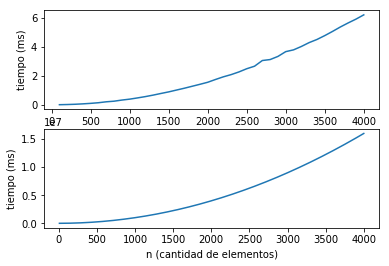

In [3]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure()
# Ploteamos curva de tiempo de IS.
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(x="n", y="IS", data=df);
plt.ylabel("tiempo (ms)")

# Ploteamos curva de complejidad.
df_cuadratico = pd.DataFrame({"x": [i for i in range(10, 4000)], "y": [i**2 for i in range(10, 4000)]});
ax2 = fig.add_subplot(212)
ax2 = sns.lineplot(x="x", y="y", data=df_cuadratico);
plt.ylabel("tiempo (ms)");
plt.xlabel("n (cantidad de elementos)");

Por lo tanto, ahora los graficamos en la misma figura y podemos compararlos de manera más fácil.

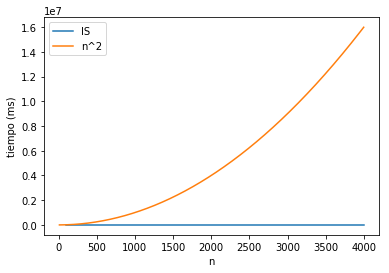

In [4]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure();
# Ploteamos curva de tiempo de IS vs la curva de complejidad.
df_cuadratico = pd.DataFrame({"n": [i for i in range(10, 4000)], "IS": [i**2 for i in range(10, 4000)]});
ax1 = sns.lineplot(x="n", y="IS", data=df);
ax1 = sns.lineplot(x="n", y="IS", data=df_cuadratico);
ax1.legend(["IS", "n^2"]);
plt.ylabel("tiempo (ms)");

Parece que IS en la practica es lineal... En realidad no, es porque la constante de n^2 se come a la de IS. 
<br /> Podemos ajustar esa constante y tomar 0.5e-6 para ver si la forma se parece. Este proceso es muy a mano. Tiene que haber algo mejor...

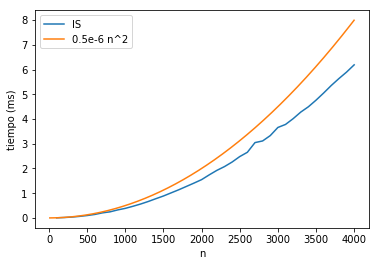

In [5]:
# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure();
# Ploteamos curva de tiempo de IS vs la curva de complejidad.
df_cuadratico = pd.DataFrame({"n": [i for i in range(10, 4000)], "IS": [0.5e-6*(i**2) for i in range(10, 4000)]});
ax1 = sns.lineplot(x="n", y="IS", data=df);
ax1 = sns.lineplot(x="n", y="IS", data=df_cuadratico);
ax1.legend(["IS", "0.5e-6 n^2"]);
plt.ylabel("tiempo (ms)");

## Correlación
Una manera más precisa de ver si dos series de datos o variables correlacionan, es intentar ver el crecimiento de las dos series en paralelo. Por ejemplo, por cada valor de n, existe un valor IS(n) que es el tiempo de ejecución real del algoritmo y un valor cota(n)=n^2. Podemos tomar estos valores ordenados en dos vectores X=[IS(1), IS(2), ...], Y=[cota(1), cota(2), ...] y graficar una serie de puntos.

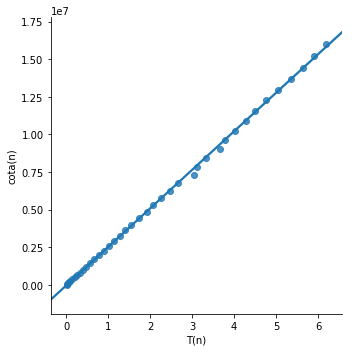

In [8]:
# Creamos la columna cota que vale n^2.
df["cota"] = df["n"] ** 2
df2 = pd.DataFrame({'IS':tuple(X), 'cota':tuple(Y)});
ax1 = sns.lmplot(x='IS', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota(n)");

### Coeficiente de correlación de Pearson
Para ver si dos funciones correlacionan, es decir, si se parecen y cuánto se parecen, podemos usar alguna técnica un poco más avanzada. Por ejemplo, el coeficiente de correlación de Pearson ( https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson ). <br />
La idea es tomar alguna medida que sea independiente de las magnitudes y solamente indique si dos funciones o series de datos crecen o decrecen del mismo modo (o si hay una correlación negativa, es decir, cuando uno crece el otro decrece). <br />
Para calcularlo se utiliza el siguiente calculo
![Calculo del coeficiente de correlación de Pearson](img/pearson.png)
donde xi es el valor de la muestra i de la primera serie de datos, e y_i es el valor de la muestra i de la segunda serie de datos. <br /> <br />

El resultado de esta expresión es un número entre -1 y 1 que indica lo siguiente ( https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson ):
* Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.
* Si 0 < r < 1, existe una correlación positiva.
* Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.
* Si -1 < r < 0, existe una correlación negativa.
* Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

In [11]:
# corrcoef es una función de numpy que indica el coeficiente de correlacion de Pearson.
r = np.corrcoef(df["IS"], df["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))
    

El coeficiente de correlación de Pearson es: r=0.9997584640945326


Por lo tanto, podemos concluir que hay una correlación positiva casi perfecta entre el tiempo de ejecución y la complejidad algorítmica.